# Diabetic Retinopathy Detection: Identify Severity of Diabetic Retinopathy in Eye Images

University of Massachusetts Lowell   
COMP.5300/COMP.4600 Computing in Health and Medicine  
Dr. Wenjin Zhou  
Brent Garey, Kelly Ly, Ann Men, Bishoy Sargius, and William Zouzas  
Due April 26, 2022  

<h1>Git Commands</h1>
<h5>Adds changes of the code to our github repo</h5>
git add .<br>
git commit -m "some message"<br>
git push<br>

<h5>Prints out what happened with the code worked on and github</h5>
git status<br>

<h5>Downloads the files from the github repo</h5>
git pull<br>

## Read in Labels

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os

In [2]:
# Read csv file
df_labels = pd.read_csv("data/trainLabels.csv")

#Display metadata
df_labels

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


## Visualize Level Distribution

Text(0.5, 1.0, 'Distribution of Diabetic Retinopathy Levels (0-4)')

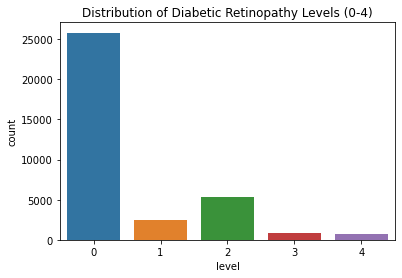

In [3]:
# Import Seaborn library
# Source: https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
import seaborn as sns
  
# count plot on single categorical variable
sns.countplot(x = df_labels['level'])
 
# Show the plot
plt.title('Distribution of Diabetic Retinopathy Levels (0-4)')

## Create and Organize Data Folders

In [18]:
# Import os library
import os

In [5]:
# Make new folder to hold labeled data
try:
    os.mkdir('./data/labeled_data')
except FileExistsError:
    print('./data/labeled_data already exists')

./data/labeled_data already exists


In [6]:
# Create subfolders for each level
for i in range(5):
    try:
        os.mkdir('./data/labeled_data/' + str(i))
    except FileExistsError:
        print('./data/labeled_data/' + str(i) + ' already exists')

./data/labeled_data/0 already exists
./data/labeled_data/1 already exists
./data/labeled_data/2 already exists
./data/labeled_data/3 already exists
./data/labeled_data/4 already exists


## Visualize Sample Eye Images

In [7]:
# What is the data type of the levels? (0-4) Strings or integers?
type(df_labels['level'][0])

numpy.int64

<h1>Creating Image Subset from labeled data file</h1>
The dataset from kaggle is about 88 GB of images which is huge to download on our local machine so our group decided to just simply use a subset of the kaggle dataset. On my local machine I extracted just one of the zip files from Kaggle using 7-zip. A single zip file is about 8 GB which is still very large so I would make a subset of the single zip file that I had extracted that would hold about 1000 images. I am choosing 1000 images because the Inception v2 research article that the group had read had a dataset that was 1200 images.<br><br>
The goal of this code is to just grab 1000 images from the training zip file I created on my local machine. I will then upload the smaller dataset to our github repository if the file size is small enough.

The code cell below is commented out since we have already took a subset of the images and don't need to run this cell again

In [17]:
# # This is the absolute file path on my machine
# bishoy_local_kaggle_data_dir = r"C:\Users\bisho\Desktop\College\Classes\Junior\Spring 2022\CompHealthMedicine\Final Project\data\train"

# image_names_list = sorted(os.listdir(bishoy_local_kaggle_data_dir))[:1000]
# print("Length of image_names_list is: ", len(image_names_list), '\n', image_names_list)

Length of image_names_list is:  1000 
 ['10003_left.jpeg', '10003_right.jpeg', '10007_left.jpeg', '10007_right.jpeg', '10009_left.jpeg', '10009_right.jpeg', '1000_left.jpeg', '1000_right.jpeg', '10010_left.jpeg', '10010_right.jpeg', '10013_left.jpeg', '10013_right.jpeg', '10014_left.jpeg', '10014_right.jpeg', '10015_left.jpeg', '10015_right.jpeg', '10017_left.jpeg', '10017_right.jpeg', '10022_left.jpeg', '10022_right.jpeg', '10028_left.jpeg', '10028_right.jpeg', '10029_left.jpeg', '10029_right.jpeg', '1002_left.jpeg', '1002_right.jpeg', '10030_left.jpeg', '10030_right.jpeg', '10031_left.jpeg', '10031_right.jpeg', '10032_left.jpeg', '10032_right.jpeg', '10035_left.jpeg', '10035_right.jpeg', '10042_left.jpeg', '10042_right.jpeg', '10043_left.jpeg', '10043_right.jpeg', '10046_left.jpeg', '10046_right.jpeg', '10047_left.jpeg', '10047_right.jpeg', '10048_left.jpeg', '10048_right.jpeg', '10050_left.jpeg', '10050_right.jpeg', '10053_left.jpeg', '10053_right.jpeg', '10058_left.jpeg', '10058_ri

In [8]:
import shutil
data_dir = "./data/labeled_data/"  # This is the data folder in the git repo that holds that label folders from 0 to 4
image_value_dic = {}  # This is a dictionary that will take the image name and the associated value from the df_labels dataframe

for i in range(len(df_labels)):
    # Grabs the image name from "image" column in df_labels and sets that as key then grabs value from "value" column and sets that as value
    image_value_dic[str(df_labels.iloc[i]['image']) + ".jpeg"] = df_labels.iloc[i]['level']
    
print(image_value_dic)

{'10_left.jpeg': 0, '10_right.jpeg': 0, '13_left.jpeg': 0, '13_right.jpeg': 0, '15_left.jpeg': 1, '15_right.jpeg': 2, '16_left.jpeg': 4, '16_right.jpeg': 4, '17_left.jpeg': 0, '17_right.jpeg': 1, '19_left.jpeg': 0, '19_right.jpeg': 0, '20_left.jpeg': 0, '20_right.jpeg': 0, '21_left.jpeg': 0, '21_right.jpeg': 0, '22_left.jpeg': 0, '22_right.jpeg': 0, '23_left.jpeg': 0, '23_right.jpeg': 0, '25_left.jpeg': 0, '25_right.jpeg': 0, '30_left.jpeg': 1, '30_right.jpeg': 2, '31_left.jpeg': 0, '31_right.jpeg': 0, '33_left.jpeg': 0, '33_right.jpeg': 0, '36_left.jpeg': 1, '36_right.jpeg': 0, '40_left.jpeg': 2, '40_right.jpeg': 0, '41_left.jpeg': 0, '41_right.jpeg': 0, '42_left.jpeg': 0, '42_right.jpeg': 0, '46_left.jpeg': 0, '46_right.jpeg': 0, '47_left.jpeg': 0, '47_right.jpeg': 0, '49_left.jpeg': 0, '49_right.jpeg': 0, '51_left.jpeg': 2, '51_right.jpeg': 0, '52_left.jpeg': 0, '52_right.jpeg': 0, '54_left.jpeg': 2, '54_right.jpeg': 2, '56_left.jpeg': 0, '56_right.jpeg': 0, '57_left.jpeg': 0, '57_r

The code cell below is commented out since we have already sorted & pushed the images into their appropriate subfolders and don't need to run this cell again

In [11]:
# # this for loop sorts the 1000 image names in image_names_list into the appropiate dr severity folder from 0 to 4
# for image in image_names_list:
#     origin_file = bishoy_local_kaggle_data_dir + "\\" + image  # This is the file path of the current image we are looking at
#     # Find image level from image_value_dic
#     place_into_dir = os.path.join(data_dir, str(image_value_dic[image]) + "/" + image) # Depending on machine's OS may have to switch "/" with "\" or vice versa
#     # copy image from abs file path to labeled_data file that is in the repo
#     shutil.copy(origin_file, place_into_dir)

<h1>Dealing with Class Imbalance</h1>
I want to see how many images are in each folder and figure out what the weights of those images should be. This is similar to what we did in hw5/hw6.

In [9]:
num_of_0_imgs = len(os.listdir('data/labeled_data/0'))  # Goes into the specified severity level folder and counts number of images inside
num_of_1_imgs = len(os.listdir('data/labeled_data/1'))
num_of_2_imgs = len(os.listdir('data/labeled_data/2'))
num_of_3_imgs = len(os.listdir('data/labeled_data/3'))
num_of_4_imgs = len(os.listdir('data/labeled_data/4'))

img_total = (num_of_0_imgs + num_of_1_imgs + 
             num_of_2_imgs + num_of_3_imgs + 
             num_of_4_imgs)  # adds up all of the images in the folders and sets it to a variable

print("0: ", num_of_0_imgs, "\n",
      "1: ", num_of_1_imgs, "\n",
      "2: ", num_of_2_imgs, "\n",
      "3: ", num_of_3_imgs, "\n",
      "4: ", num_of_4_imgs, "\n",
      "total: ", img_total)

0:  728 
 1:  66 
 2:  159 
 3:  26 
 4:  21 
 total:  1000


Now we want to visualize distribution of classes in our subset

Text(0.5, 1.0, 'Distribution of Diabetic Retinopathy Levels (0-4) Subset')

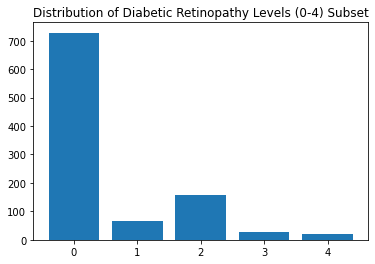

In [10]:
image_lengths = [num_of_0_imgs, num_of_1_imgs, num_of_2_imgs, num_of_3_imgs, num_of_4_imgs]
classes = [str(i) for i in range(5)]

# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
plt.bar(classes, image_lengths)
 
# Show the plot
plt.title('Distribution of Diabetic Retinopathy Levels (0-4) Subset')

Noticed a very large disproportion of the labeled images for levels 1, 3, and 4 so we should try to fix this with over sampling and then median frequency balancing to determine the weights of each image after getting a better destribution.

In [13]:
# for i = (the last 201 images) in the level 0 folder
i = 0
labeled_folder_0_dir = "data/labeled_data/0/"
labeled_folder_1_dir = "data/labeled_data/1/"
labeled_folder_3_dir = "data/labeled_data/3/"
labeled_folder_4_dir = "data/labeled_data/4/"

# generate list of images 1 severity
# generate list of images 2 severity
# generate list of images 3 severity 

for image in labeled_folder_0_dir:
    os.remove(image)
    if i < 67: # replace 67 images from 0 severity to 1 severity
        # look up image name in dictionary with value 1
        # v is the severity grade (1)
        temp_image = random.choice([img_1 for img_1,v in image_value_dic.items() if v == 1]) ##https://stackoverflow.com/questions/42438808/finding-all-the-keys-with-the-same-value-in-a-python-dictionary
            
            # if image name is not in severity folder 1 then
        while(temp_image in labeled_folder_1_dir):
            temp_image = random.choice([img_1 for img_1,v in image_value_dic.items() if v == 1])
        # push into folder 1
        shutil.copy(data_dir, labeled_folder_1_dir)
    elif i < 134:
        # look up image name in dictionary with value 3
        # v is the severity grade (3)
        temp_image = random.choice([img_3 for img_3,v in image_value_dic.items() if v == 3]) ##https://stackoverflow.com/questions/42438808/finding-all-the-keys-with-the-same-value-in-a-python-dictionary
            
            # if image name is not in severity folder 1 then
        while(temp_image in labeled_folder_3_dir):
            temp_image = random.choice([img_3 for img_3,v in image_value_dic.items() if v == 3])
        # push into folder 1
        shutil.copy(data_dir, labeled_folder_3_dir)
    else:  # replace 67 images from 0 severity to 4 severity
        # look up image name in dictionary with value 3
        # v is the severity grade (4)
        temp_image = random.choice([img_4 for img_4,v in image_value_dic.items() if v == 4]) ##https://stackoverflow.com/questions/42438808/finding-all-the-keys-with-the-same-value-in-a-python-dictionary
            
            # if image name is not in severity folder 1 then
        while(temp_image in labeled_folder_4_dir):
            temp_image = random.choice([img_4 for img_4,v in image_value_dic.items() if v == 4])
        # push into folder 1
        shutil.copy(data_dir, labeled_folder_4_dir)
    i += 1

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'd'

In [11]:
import statistics
file_size_list = [num_of_0_imgs, num_of_1_imgs, 
                  num_of_2_imgs, num_of_3_imgs, 
                  num_of_4_imgs]  # adds up all of the images in the folders and sets it to a variable
classes = [str(i) for i in range(5)]

freq_c_vals = file_size_list   # freq(c)

#store datasize while we are here
datasize = sum(freq_c_vals)

statsres = [statistics.median(freq_c_vals)/freq_c for freq_c in freq_c_vals]   # median_freq / freq(c)

median_frequency_balancing = dict(zip(classes, statsres))
median_frequency_balancing

{'0': 0.09065934065934066,
 '1': 1.0,
 '2': 0.41509433962264153,
 '3': 2.5384615384615383,
 '4': 3.142857142857143}

## Data Pre-Processing
For preprocessing the images, the first step that is taken is to resize the images in the dataset into the same size which in the article was 600x600 pixels. 

The next step was to begin color normalization since the images were taken by different camera models which means that images can have distinct color temperatures and illumination so normalizing these colors can help reduce noise and variance and make the images more similar. 

In short this is done by getting the average value of red, blue, and green pixels in an image. Then median filtering is done which is used when trying to find and differentiate the features of an image such as the edges or discontinuities. 

The next step of pre-processing is using CLAHE, or Contrast Limited Adaptive Histogram Equalization, which helps deblur the image and remove noise from the image through local contrast enhancement which the images are now ready for optical disk segmentation.

In [19]:
# preprocessing and augmentation
# resizing images to 600x600

img_count = 0
i = 0

# load image directory
img_dir = "data/labeled_data"

# iterate through labeled folders
for i in range(5):
    n_img_dir = img_dir + "/" + str(i)
    
    # directory exists
    if (os.path.isdir(n_img_dir)):
        
        # iterate through images
        for img in os.listdir(n_img_dir):
            
            # check the file extension
            if (img.endswith(".jpeg")):
                
                # load image
                r_img = Image.open(n_img_dir + "\\" + img)
            
                # image successfully loaded; perform transformations
                r_img = r_img.resize((600, 600))
                
                r_img.show()

KeyboardInterrupt: 

Median Filtering

In [7]:
# Import OpenCV and numpy
# Need to install this in terminal: pip install opencv-python
import cv2
import numpy as np

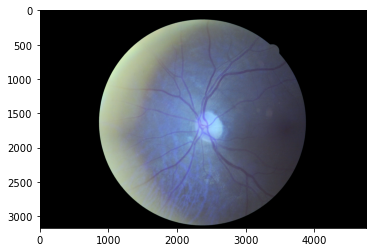

In [16]:
# Implement median filtering
import cv2
import matplotlib.pyplot as plt

# Test median filtering for one image to see if it works properly
img = cv2.imread('data/labeled_data/0/10_left.jpeg')
median = cv2.medianBlur(img, 5)

# Show modified image
plt.imshow(img)
plt.show()

data/labeled_data/0
10284_right.jpeg


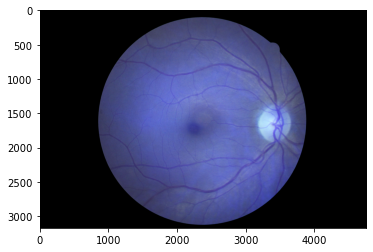

data/labeled_data/1
10657_left.jpeg


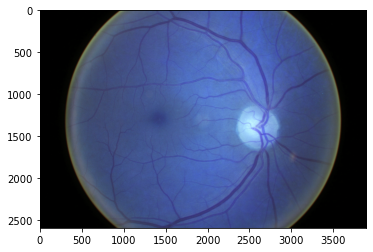

data/labeled_data/2
11098_right.jpeg


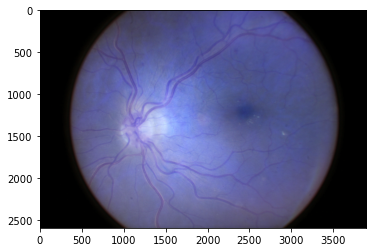

data/labeled_data/3
10125_right.jpeg


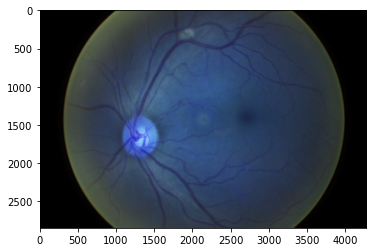

data/labeled_data/4
11032_right.jpeg


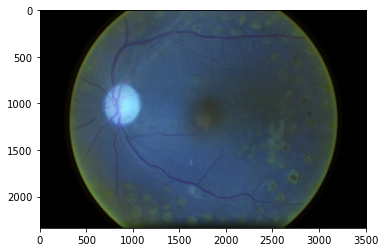

In [28]:
# Implement median filtering for all images in dataset
# Use for loop from previous step which was resizing to 600x600

# Load image directory
img_dir = "data/labeled_data"

# Iterate through labeled folders
for i in range(5):
    n_img_dir = img_dir + "/" + str(i)
    print(n_img_dir)
    
    # Directory exists
    if (os.path.isdir(n_img_dir)):
        
        # Iterate through images
        for img in os.listdir(n_img_dir):
            
            # Check the file extension
            if (img.endswith(".jpeg")):
                print(img)
                
                # Load image            
                img = cv2.imread(n_img_dir + "/" + img)
                
                # Median Filtering
                median = cv2.medianBlur(img, 5)
                
                # Display images
                plt.imshow(img)
                plt.show()
                
                # Need to save images with median filter applied
                
            break # Remove break to apply median filter to all images


## Optical Disk Segmentation
The third step in this process is Optical Disk (OD) Segmentation. In this step, the RGP channels are changed to HSV channels, and the OD is identified by applying the Morphological closing method and contour filling. 

The former dilates the area of interest and removes the borders, while the latter fills in the gaps. Finally, the OD-segmented image can be obtained by subtracting the results of the second part from the results of the first part.

## Split Images into 4 Quadrants
The next step is to divide the images into four quadrants so that it is easier to view tiny-sized microaneurysms and other features that identify DR [1]. First, each image was resized to 600x600 which is detailed in Step 2. However, the model is expecting images with an input size of 299x299, which is too small to discern between tiny features in the eye images and can result in the misidentification of microaneurysms. Therefore, these images are further cropped into four quadrants of size 300x300. Dividing the full image into four quadrants of 300x300 meet the input size criteria of the model while retaining the size of the original image to view tiny features more easily. Overall, cropping the eye images can help reduce misidentification of microaneurysms and signs of DR.

## Data Augmentation
After the images are split into four quadrants, there are three main methods to augment the data. These steps include flipping (horizontal and vertical), 90–180° random rotation, and random zooming that ranges in between [0.85, 1.15]. The purpose of data augmentation in this step is to expand the training samples and strengthen the size of the class. Also, the combination of preprocessing and data augmentation makes the neural network insusceptible to variation attenuation, insufficient illumination, and changing orientations.

## Load data using ImageFolder

In [12]:
import torchvision
import torchvision.transforms as transforms

dataset = torchvision.datasets.ImageFolder(root="data/labeled_data")
dataset

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: data/labeled_data

In [14]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((600, 600))
])

transform

Compose(
    ToTensor()
    Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=None)
)